# Proyecto No. 2

#### Sebastián Solorzano - 21826

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

### Análisis de datos exploratorio (EDA)

In [57]:
df = pd.read_csv('message.csv', usecols=[0, 1], skiprows=1, names=['type', 'message'], encoding='latin-1')

In [58]:
df.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [59]:
df.shape

(5572, 2)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   type     5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [61]:
df['type'].value_counts()

type
ham     4825
spam     747
Name: count, dtype: int64

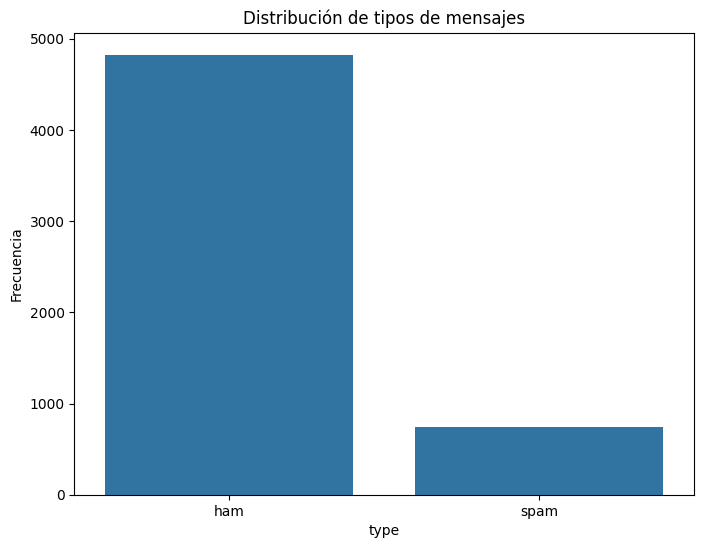

In [62]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='type')
plt.title('Distribución de tipos de mensajes')
plt.xlabel('type')
plt.ylabel('Frecuencia')
plt.show()

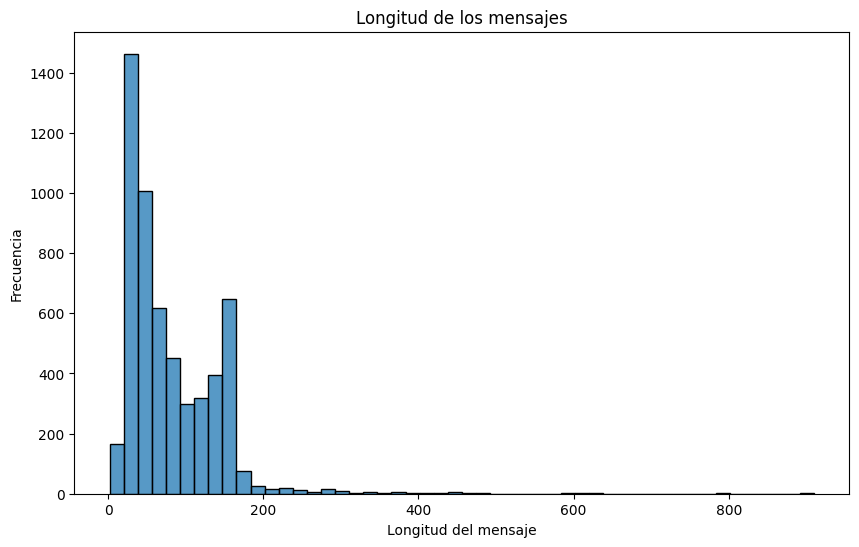

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=df['message'].apply(len), bins=50)
plt.title('Longitud de los mensajes')
plt.xlabel('Longitud del mensaje')
plt.ylabel('Frecuencia')
plt.show()

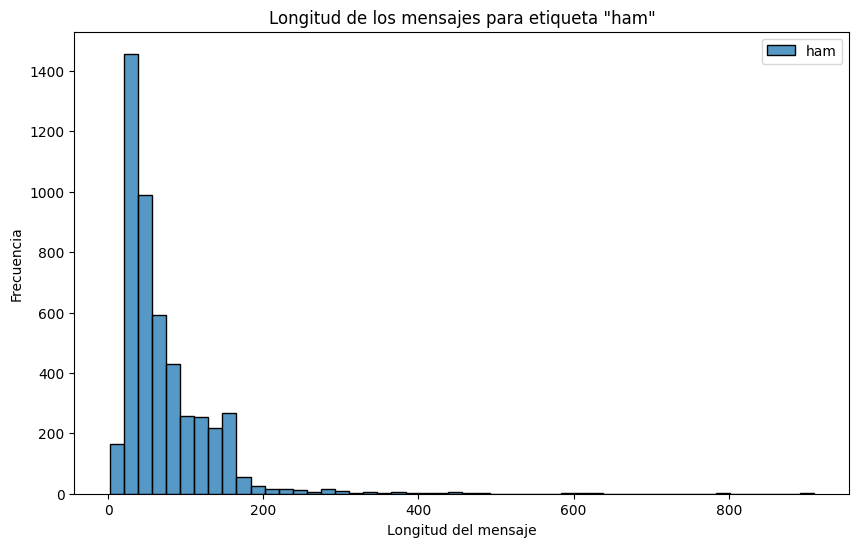

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['type'] == 'ham'], x=df[df['type'] == 'ham']['message'].apply(len), bins=50, label='ham')
plt.title('Longitud de los mensajes para etiqueta "ham"')
plt.xlabel('Longitud del mensaje')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

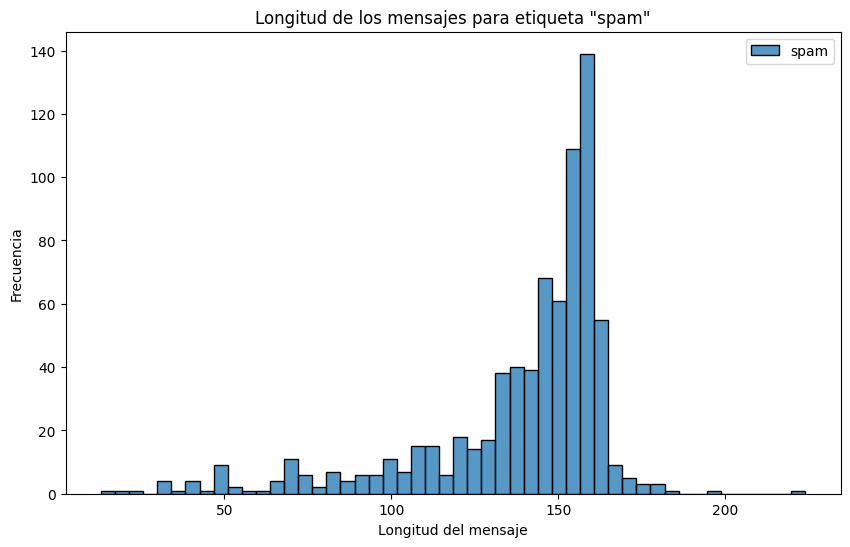

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['type'] == 'spam'], x=df[df['type'] == 'spam']['message'].apply(len), bins=50, label='spam')
plt.title('Longitud de los mensajes para etiqueta "spam"')
plt.xlabel('Longitud del mensaje')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

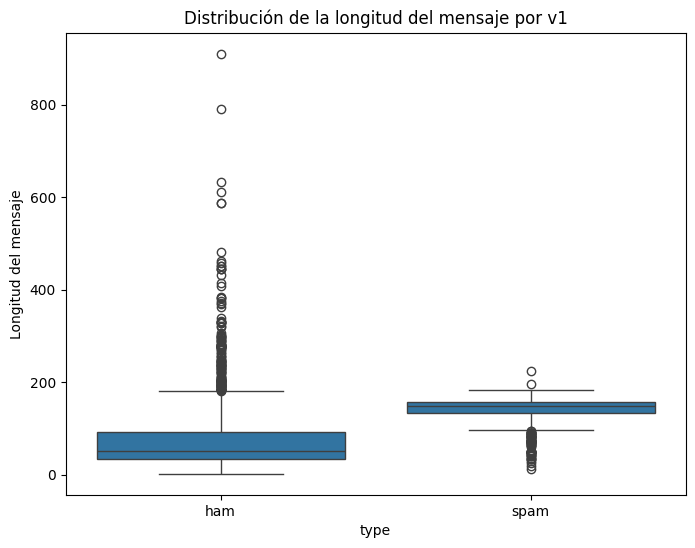

In [66]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='type', y=df['message'].apply(len))
plt.title('Distribución de la longitud del mensaje por v1')
plt.xlabel('type')
plt.ylabel('Longitud del mensaje')
plt.show()

### Limpieza de datos

In [86]:
datos = pd.read_csv('spam-proyecto.csv', usecols=[0, 1], skiprows=1, names=['type', 'message'], encoding='latin-1')

In [67]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words)

{'before', "shan't", 'yourselves', 'below', 'such', 'where', 'now', 'out', 'who', 'being', 'o', 'mustn', 'have', 'of', "you're", 'when', 'ma', 'ours', 'from', 'will', 'while', 'only', 'haven', 'yourself', 'if', 'down', "needn't", 'you', 'ain', 'which', 'isn', 'at', 'during', "won't", 'more', 'be', 'had', 'nor', 's', 'by', 'has', 'he', "weren't", "you'd", 'further', 'off', 'then', 'we', 'there', 'been', 'didn', 'theirs', 'own', 'what', "mustn't", 'wasn', "should've", "hadn't", 'shouldn', 'just', 'hadn', "mightn't", 'some', 'not', 'itself', "haven't", 'through', 'yours', 'until', 'with', 'up', 'your', 'her', 'all', 'ourselves', 'so', 'an', 'on', "doesn't", 'after', 'very', 'any', 'him', 'our', 'should', 'aren', 'both', 'same', 'is', 'again', 'himself', 'in', "aren't", 'it', "wouldn't", 're', 'myself', 'am', 'herself', 'll', 'wouldn', 'd', 'did', 'them', 'between', 'was', 'the', 'weren', 'that', 'because', "isn't", 'having', 'most', "it's", "you'll", 'this', 'those', 'i', 'doing', "hasn't

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\50242\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [78]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\50242\AppData\Roaming\nltk_data...


In [79]:
stemmer = PorterStemmer()

In [90]:
def preprocess_message(message):
    # Convertir a minúsculas
    message = message.lower()

    # Dividir el mensaje en palabras
    words = message.split()

    # Eliminar signos de puntuación y palabras comunes
    words = [re.sub(r'[^a-zA-Z0-9]', '', word) for word in words if word not in stop_words]

    # Lematizar las palabras
    words = [lemmatizer.lemmatize(word) for word in words]

    # Aplicar stemming a las palabras
    words = [stemmer.stem(word) for word in words]

    # Eliminar palabras entre comillas
    words = [word for word in words if not re.match(r'^\W+$', word)]

    # Unir las palabras en un solo mensaje
    processed_message = ' '.join(words)

    return processed_message

In [91]:
def preprocess_column(column):
    preprocessed_column = column.apply(preprocess_message)
    column[:] = preprocessed_column.values
    return column

In [92]:
preprocess_column(datos['message'])

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                     nah think go usf life around though
                              ...                        
5567    2nd time tri 2 contact u u 750 pound prize 2 c...
5568                                b go esplanad fr home
5569                              piti mood soani suggest
5570    guy bitch act like id interest buy someth el n...
5571                                       rofl true name
Name: message, Length: 5572, dtype: object

In [94]:
datos.head()

,type,message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah think go usf life around though
